In [1]:
import pygame
import random
import requests
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow
#from google.colab import output
import time
import pickle
import os, sys
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import pandas as pd

pygame 2.5.2 (SDL 2.28.3, Python 3.10.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


# Sarsa(0)

## Convergência (comparação de número de iterações)

O primeiro teste no algoritmo do SARSA foi para avaliar se ele estava convergindo para o nosso ambientes. Um ponto que percebemos conforte os treinos do SASRSA foram que conforme a quantidade de iterações aumentava, mais tempo demorava para o agente ser treinado. Esse ponto é imporante pensando em evolução do modelo e a relação entre custo e tempo, pensando em obter um agente eficaz.

Realizamos os testes de treinamos para 1000, 3000 e 10000 iterações em um ambiente não estocástico inicialmente e computamos o valor da tabela Q para todos os pares estado-ação explorados pelo agente durante o treinamento. Um ponto importante é que esse algoritmo não leva em consideração o parâmetro λ, então estamos dando apenas um passo para avaliar o próximo estado e ação (pode ser considerado um SARSA(0)). Outros pontos importantes para a análise dos resultados abaixo é do reward, que foi -1 a cada passo do agente e 99 no caso de pegar a fruta/comida e a mesma proposta usada em MC para evitar loopings.

Para conhecimento, o tempo de treinamento foi de apenas alguns segundos para 1000 iterações e evoluiu para aprox. 30 minutos para 10000 iterações.

Nas imagens abaixo podemos avaliar os valores observados pelo agente de cada estado e a média de passos de acordo com a quantidade de episódios no treino. Podemos avaliar que treinando o agente com 1000 episódios, ele se concentrou no centro do tabuleiro, em um comportamento de "linha reta" partindo do centro e teve uma média de 155 passos até encontrar a fruta. Já conforme aumentamos a quantidade de episódios, ele começou a se movimentar por todo o tabuleiro, melhorando assim o conhecimento do agente sobre o mundo e a direção necessária para ir até a fruta, já a quantidade de passos médios por episódio até chegar a fruta foi otimizado, que caiu para 55 passos em média com 3000 episódios de treino e 27 passos em média para 10000 episódios de treinamento.

Além disso, na imagem 2 é possível ver que temos um episódio outlier, com aproximadamente 25k passos até encontrar a fruta. Isso mostra que com poucos episódios de treinamento, o agente do SARSA(0) ainda não conseguiu aprender a política completamente. Esse comportamento de looping já não é visto com tanta frequência conforme a quantidade de episódios do treino aumenta.

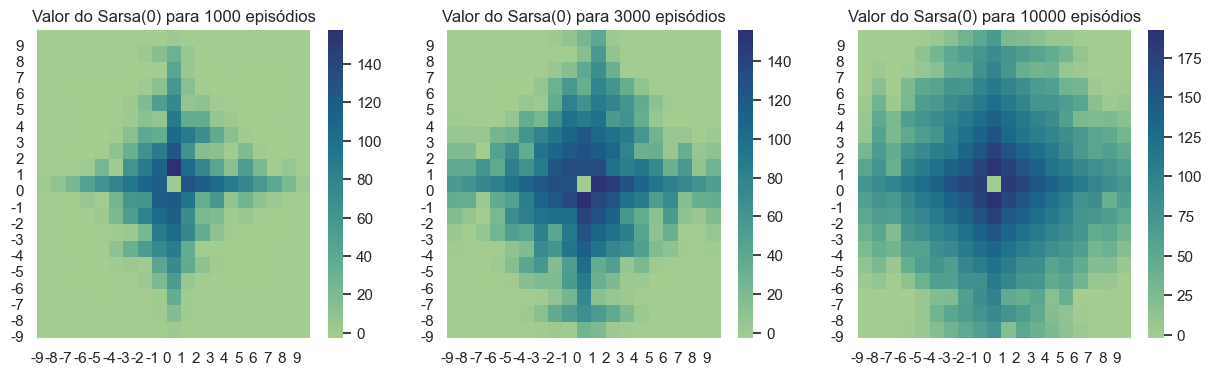

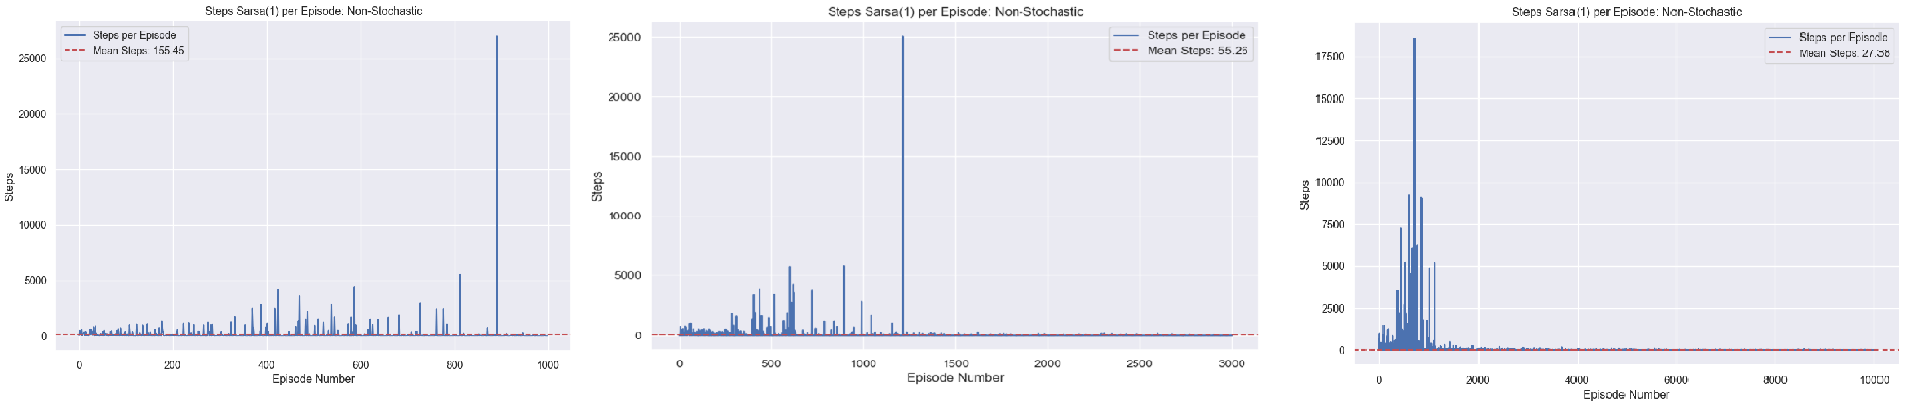

## Comparação entre diferentes rewards

Outro ponto para comparação foi avaliar a convergência do agente para diferentes rewards. Como na análise de convergência usamos um reward de -1 a cada passo em direção a fruta e 99 ao alcançá-la, testamos outras duas combinações:
1. Reward de 99 ao alcançar a fruta e -10 a cada passo;
2. Reward de 99 ao alcançar a fruta, sem reward negativo por passo.

A primeira combinação de reward não foi muito satisfatória para o SARSA(0), pois o agente entrou em um looping infinito e não foi possível rodar nenhum treino com mais de 500 episódios, pois a função dava erro de time out. Já a segunda combinação foi bem positiva para o SARSA(0), com convergências mais rápidas (alcançando uma média de passos menor mais rápido que a combinação explorada na análise de convergência).

Analisando mais afundo cada um dos resultados, nas duas imagens abaixo temos o valor do agente para a 1º combinação de reward e a quantidade média de passos por episódio durante o treinamento. É possível ver que o agente entrou em looping no centro do tabuleiro, não explorando quase nada, com uma média de passos altíssima. A média de passos com certeza é influenciada pela pouca quantidade de episódios no treinamento, mas a não possibilidade de aumentar os episódios por conta de looping e time-out do agente, reforça que essa combinação de reward não foi satisfatória.

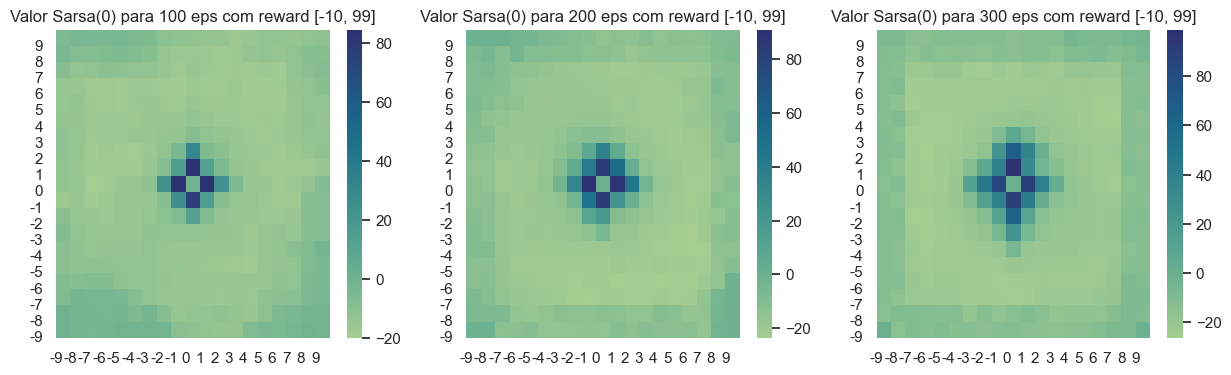

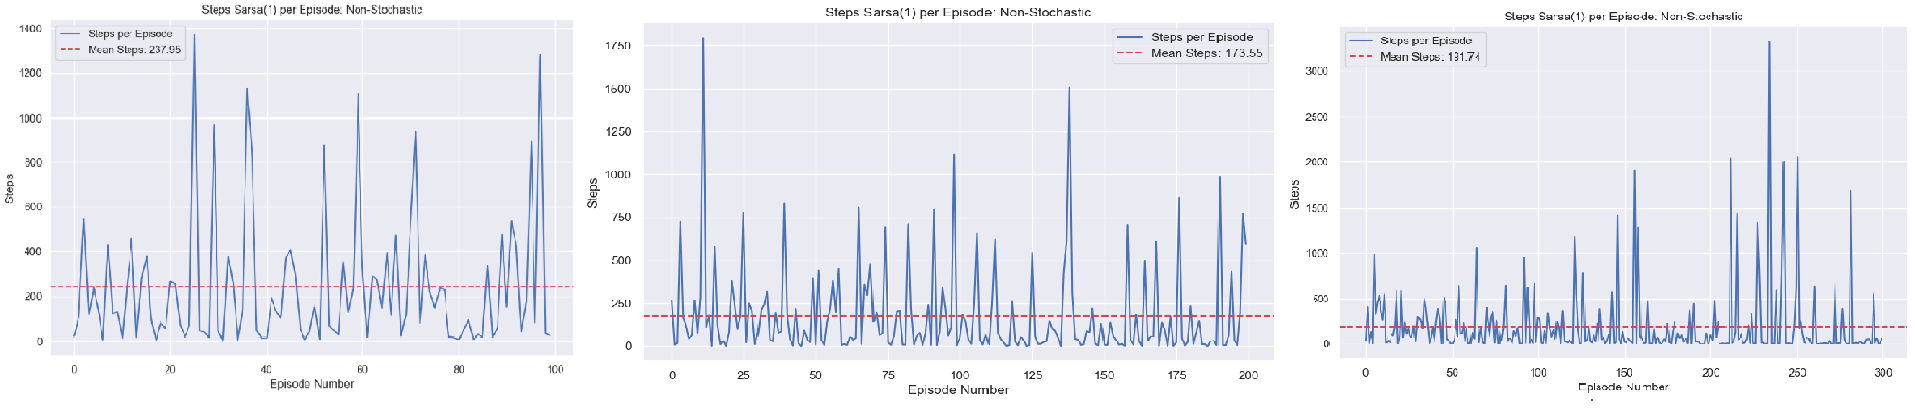

Agora avaliando a segunda combinação de reward, ela foi bem positiva para o SARSA(0), igual a combinação de reward [-1, 99] utilizado na comparação da convergência (primeiro tópico). Abaixo podemos avaliar o valor do agente e a média de passos por episódios para os treinamentos com 1000, 3000 e 10000 episódios cada. 

Avaliando os valores do agente, o mesmo comportamento pode ser visto em relação ao primeiro reward testado ([-1, 99]): com poucos episódios o agente se manteve no centro do tabuleiro, mas ao treinar com 10000 episódios, ele já conseguiu aprender a se movimentar por todo o tabuleiro. A grande diferença entre esses dois rewards são a média de passos por episódio, que apenas com 1000 episódios, o agente teve uma média de 18 passos, enquanto no reward [-1, 99] anterior esse valor foi maior que 100. Esse fato se deu principalmente pela ausencia de loopings utilizando o reward [0, 99]. O melhor resultado foi treinando o agente com 10000 episódios, onde obtivemos uma média de passos menor que 10. No reward anterior [-1, 99] esse valor foi de 27, ou seja, apenas retirando o reward negativo a cada passo conseguimos reduzir em aproximadamente 17 passos na média por episódio. 

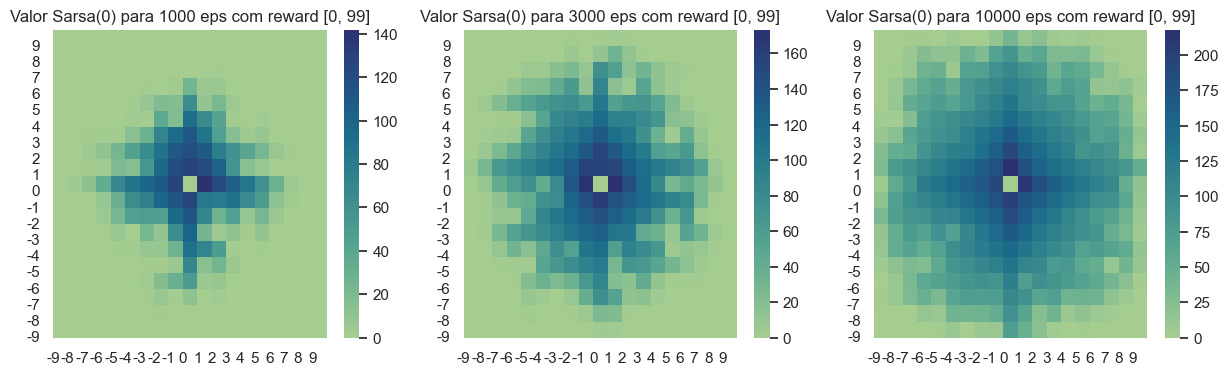

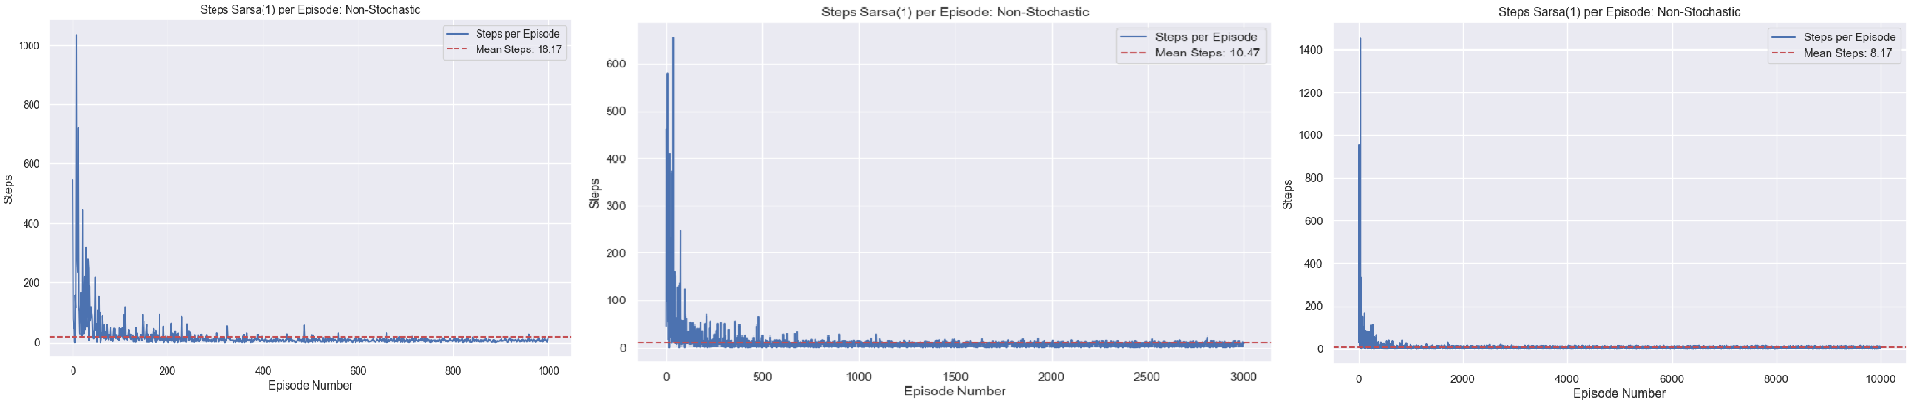

## Estocasticidade

Para avaliar como o SARSA(0) se comportaria em ambientes estocásticos, comparamos o treinamento com 5000 e 10000 episódios considerando três níveis de estocasticidade: um ambiente 20%, 50% e 90% estocástico. O objetivo é comparar a média de passos e a função valor dos agentes nos ambientes com os resultados já obtidos nos testes anteriores.

Na primeira análise, podemos avaliar o treinamento do agente utilizando 5000 episódios para cada um dos três ambientes estocásticos propostos. O SARSA(0) pareceu não sofrer tanto com os dois primeiros ambientes, já que é possível perceber que a partir de 2000 episódios o agente já não entrou mais em looping e obteve uma média de passos razoável, mesmo sendo maior do que as encontradas nos testes sem estocasticidade no ambiente. Já para o ambiente 90% aleatório em todos os episódios o agente entrou em loop (mais de 1000 passos no episódio) e andou no tabuleiro de maneira aleatória, sem nenhuma política de movimento. 

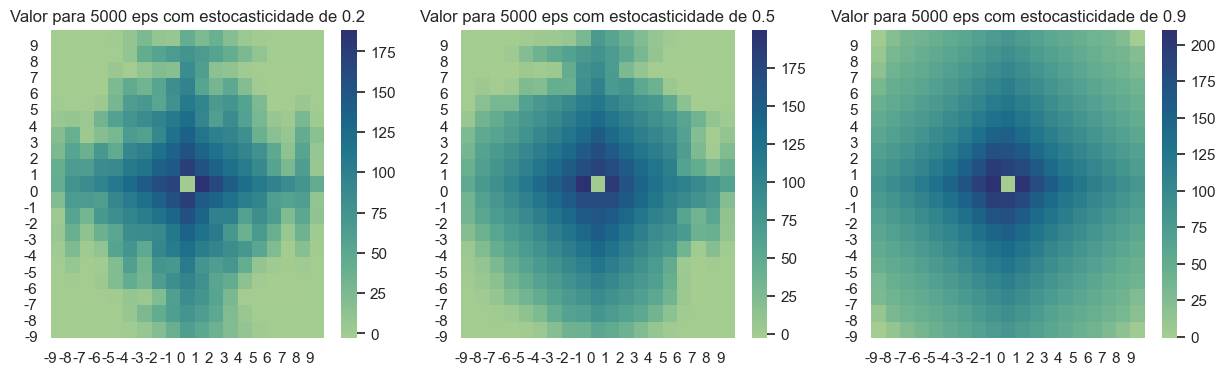

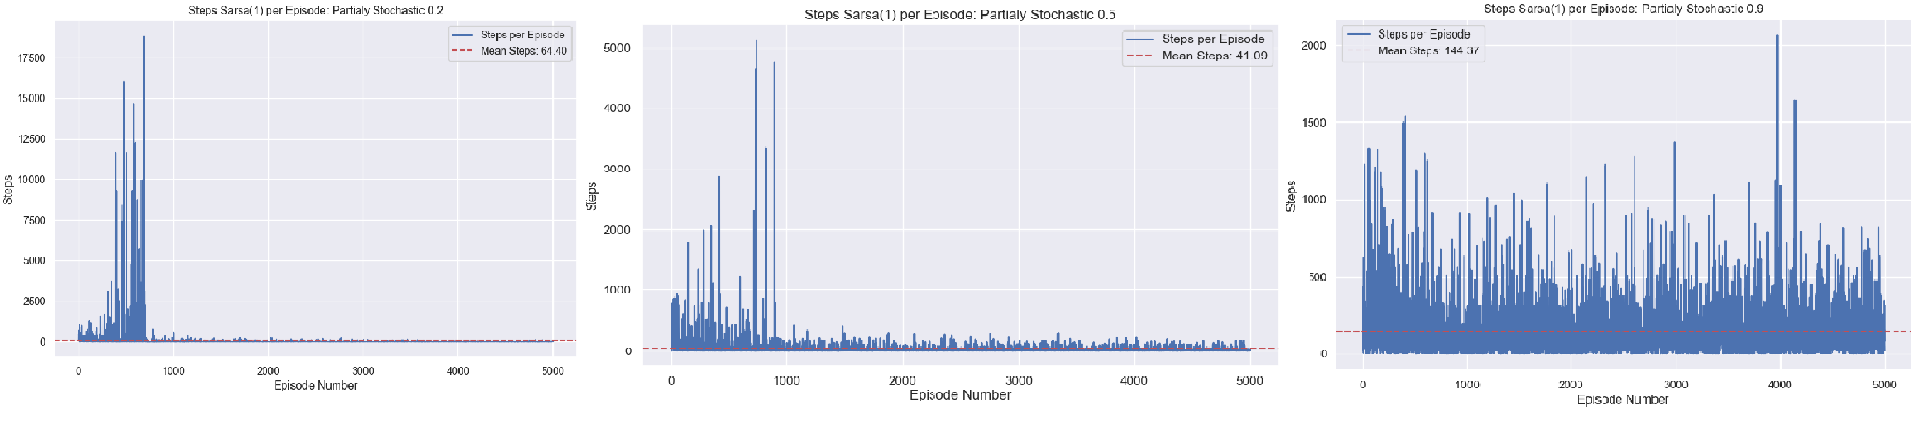

O mesmo comportamento pode ser visto treinando o agente com 10000 episódios. Nos dois primeiros ambientes o agente parou de entrar em looping após os primeiros ~2000 episódios com uma matriz de valores bem parecida com as encontradas nos testes anteriores. E para o ambiente com 90% de estocasticidade, pela matriz de valores o agente até aprendeu a percorrer todo o tabuleiro, porém não foi capaz de aprender a menor direção até a fruta, fazendo uma média de quase 150 passos por episódio, entrando em looping em muitos deles.

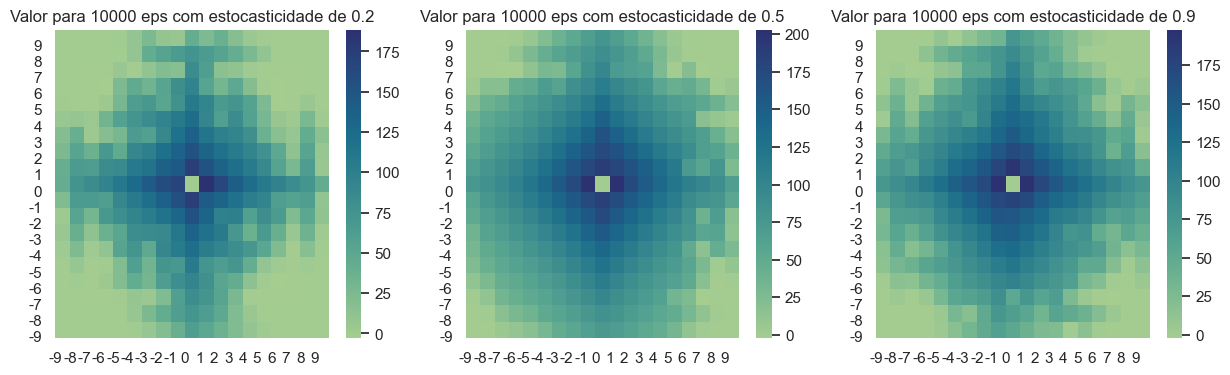

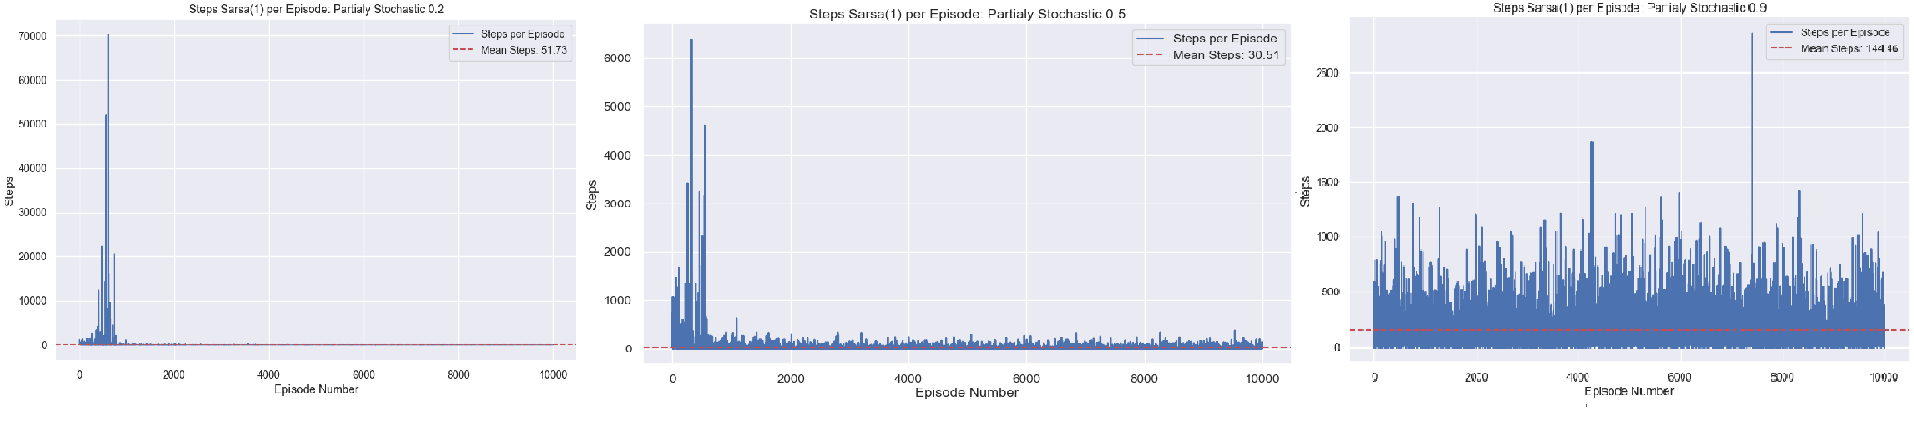

## Conclusão: SARSA(0)

O desempenho geral do SARSA(0) foi bom, com resultados bastante similares ao encontrado para MC. A melhor combinação de recompensas foi a [0, 99], ou seja, apenas mantendo a recompensa final de 99 e sem nenhuma recompensa negativa por passo dado. Nesse caso, a média de passos do SARSA(0) foi de aproximadamente 9. Em relação aos ambientes estocásticos, o SARSA(0) pareceu começar a precisar de mais episódios de treino em um ambiente quase completamente estocástico (90%). Em ambientes com 20% e 50% de aleatoriedade, também é possível concluir que seria necessário mais episódios para alcançar os mesmos passos médios do ambiente não estocástico (comparação entre os testes de 10000 eps), porém estes tiveram uma média de passos ainda razoável em relação ao ambiente 90% estocástico.

# Sarsa(λ)

Para a avaliação do SARSA(λ), a mesma classe criada para o SARSA(0) foi utilizada, porém agora adicionando a tabela E (que esse algoritmo também armazena, além da tabela Q) e levando em consideração correr por todos os pares de valores de estado-ação a cada passo do agente. Por mais que nosso ambiente tenha até poucas combinações comparado com definições de mundo mais complexas (temos 100 estados e 4 ações, totalizando 400 valores possíveis), esse algoritmo se mostrou muito mais pesado que o SARSA(0) ou o MC. Não só pelo fato de precisar de mais poder de memória para armazenar as duas tabelas E e Q, mas sim por ter que varrer todos os 400 valores dos pares estado-ação a cada passo e isso mostrou ser o maior ofensor da performance do algoritmo.

Os mesmos testes que antes foram avaliados, porém em alguns casos em uma menor quantidade de episódios (se comparar com os testes feitos no SARSA(0)): a convergência do algoritmo, a influência do reward, diferentes ambientes estocásticos e por último a performance do algoritmo para diferentes valores de λ.

Como no teste do SARSA(0) descobrimos uma melhor convergência para os valores de reward [0, 99], utilizamos essa combinação para iniciar os testes do SARSA(λ). Além disso, também fixamos um λ=0.5 (nem muito TD, nem muito MC) para avaliar a convergência de acordo com o aumento de episódios no treino e também nos outros testes que não precisavam de alteração no reward ou no valor do λ.

## Convergência (número de iterações)

## Diferentes rewards

## Estocasticidade 

## Diferente valores de λ

In [6]:
sarsa_max_value3 = {}
dists = [-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9]
actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
with open(f'teste_stochastic_0.9_sarsa_lambda__05_300runs.pkl', 'rb') as fp:
    value_function = pickle.load(fp)
for x in dists:
  for y in dists:
    m = -np.inf
    for a in actions:
      try:
        if value_function[((x, y), a)]>m:
          m = value_function[((x, y), a)]
          sarsa_max_value3[(x, y)] = m
      except KeyError:
        #print(((x, y), a))#sao as bordas
        pass

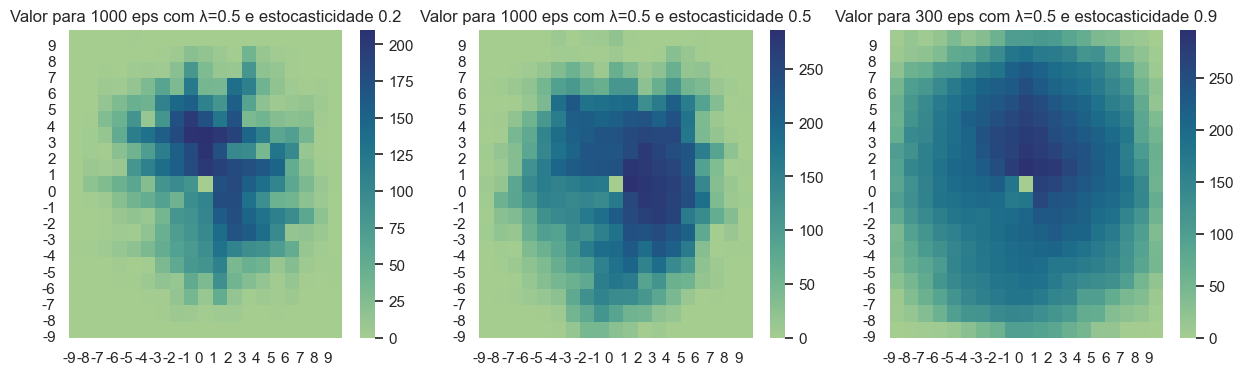

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

j=0
#k=0
for i in [1, 2, 3]:
  #if k==3:
  #  j = j+1
  #  k=0

  if i==1:
    leg = 1000
    l = 0.5
    stoc = 0.2
    value_function = sarsa_max_value1
  elif i==2:
    leg = 1000
    l = 0.5
    stoc = 0.5
    value_function = sarsa_max_value2
  else:
    leg = 300
    l = 0.5
    stoc = 0.9
    value_function = sarsa_max_value3

  #value_function = sarsa_max_value{i}
  #value_function = agent.value_function
  matrix_values = np.zeros((19, 19))
  for m in list(value_function.keys()):
    m = str(m)
    x = int(m.split(',')[0].split('(')[1])
    y = int(m.split(',')[1].split(')')[0])

    matrix_values[x+9][y+9] = value_function[(x, y)]

  matrix_values[9][9] = 0

  #print(j, k)
  sns.heatmap(matrix_values, ax = axs[j], cmap="crest")#, ax = axs[i], annot = True)
  axs[j].invert_yaxis()
  axs[j].set_xticks(range(19))
  axs[j].set_xticklabels([-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9])
  axs[j].set_yticks(range(19))
  axs[j].set_yticklabels([-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9])
  axs[j].set_title(f'Valor para {leg} eps com λ=0.5 e estocasticidade {stoc}')
  #k=k+1
  j=j+1

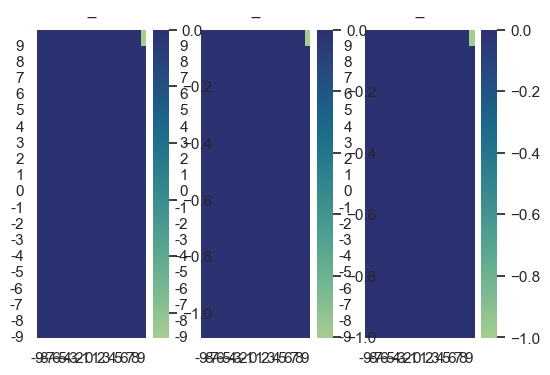

In [9]:
j=0
fig, axs = plt.subplots(1, 3, figsize=(6, 4))
for i in [1000, 3000, 10000]:
  with open(f'sarsa_stochastic_{i}_0_0_runs.pkl', 'rb') as fp:
      sarsa = pickle.load(fp)

  sarsa_max_value = {}
  dists = [-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9]
  actions = [(1, 0), (-1, 0), (0, 1), (0, -1)]
  for x in dists:
    for y in dists:
      m = -np.inf
      for a in actions:
        try:
          if sarsa[((x, y), a)]>m:
            m = sarsa[((x, y), a)]
            sarsa_max_value[(x, y)] = m
        except KeyError:
          #print(((x, y), a))#sao as bordas
          pass


  value_function = sarsa_max_value

#value_function = agent.value_function
  matrix_values = np.zeros((19, 19))
  for k in list(value_function.keys()):
    k = str(k)
    x = int(k.split(',')[0].split('(')[1])
    y = int(k.split(',')[1].split(')')[0])

  matrix_values[x+9][y+9] = value_function[(x, y)]

  matrix_values[9][9] = 0

  sns.heatmap(matrix_values, ax=axs[j], cmap="crest")#, ax = axs[0])#, annot = True)
  axs[j].invert_yaxis()
  axs[j].set_xticks(range(19))
  axs[j].set_xticklabels([-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9])
  axs[j].set_yticks(range(19))
  axs[j].set_yticklabels([-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9])
  axs[j].set_title(f'--')

  j=j+1

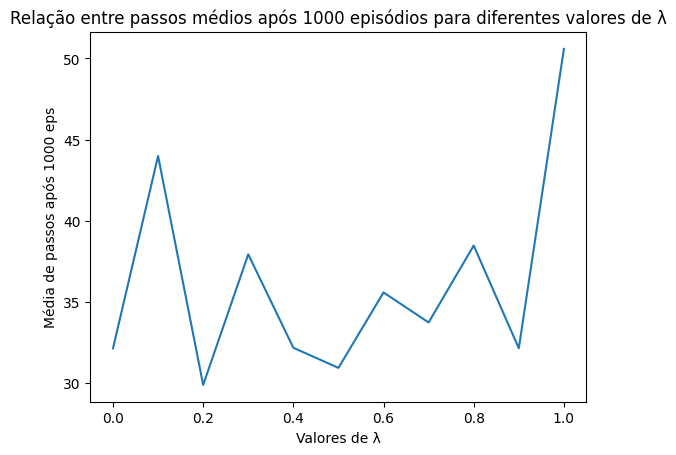

In [7]:
import matplotlib.pyplot as plt

x_axis = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] #lambda
y_axis = [32.13, 43.99, 29.88, 37.93, 32.17, 30.93, 35.58, 33.73, 38.47, 32.14, 50.59] #media de passos

plt.plot(x_axis, y_axis)
plt.title('Relação entre passos médios após 1000 episódios para diferentes valores de λ')
plt.xlabel('Valores de λ')
plt.ylabel('Média de passos após 1000 eps')
plt.show()